<h4>Claudio, questo notebook genera la chart relativa alla salute finanziaria. Essenzialmente ci sono quattro colonne che sono stackate a coppie di due: Total Assets/Current Assets e Total Debt/Current Debt. Sostanzialmente asset e debiti a breve termine e lungo termine (quelli a lungo termine saranno sempre superiori in quanto incorporano quelli a breve termine in entrambi i casi). Come vedi il colore degli asset e debiti a breve è molto più marcato perché questi sono nettamente più rilevanti. Se hai qualche idea su come mostrarlo diversamente sono bene accette, io penso che questa soluzione faccia il suo, penso che le stacked bar siano molto efficaci in questo contesto. 
</h4>

<h4>*Nota: ho scelto proprio APPL e MSFT per mostrare che secondo me anche questo garfico ha bisogno di una versione "relativa". Quello che vedi sotto compara i valori assoluti, però anche averne uno in cui le altezze delle colonne sono determinate rispetto alle dimensioni dell'azienda non sarebbe male. Domani vediamo comunque.</h4>

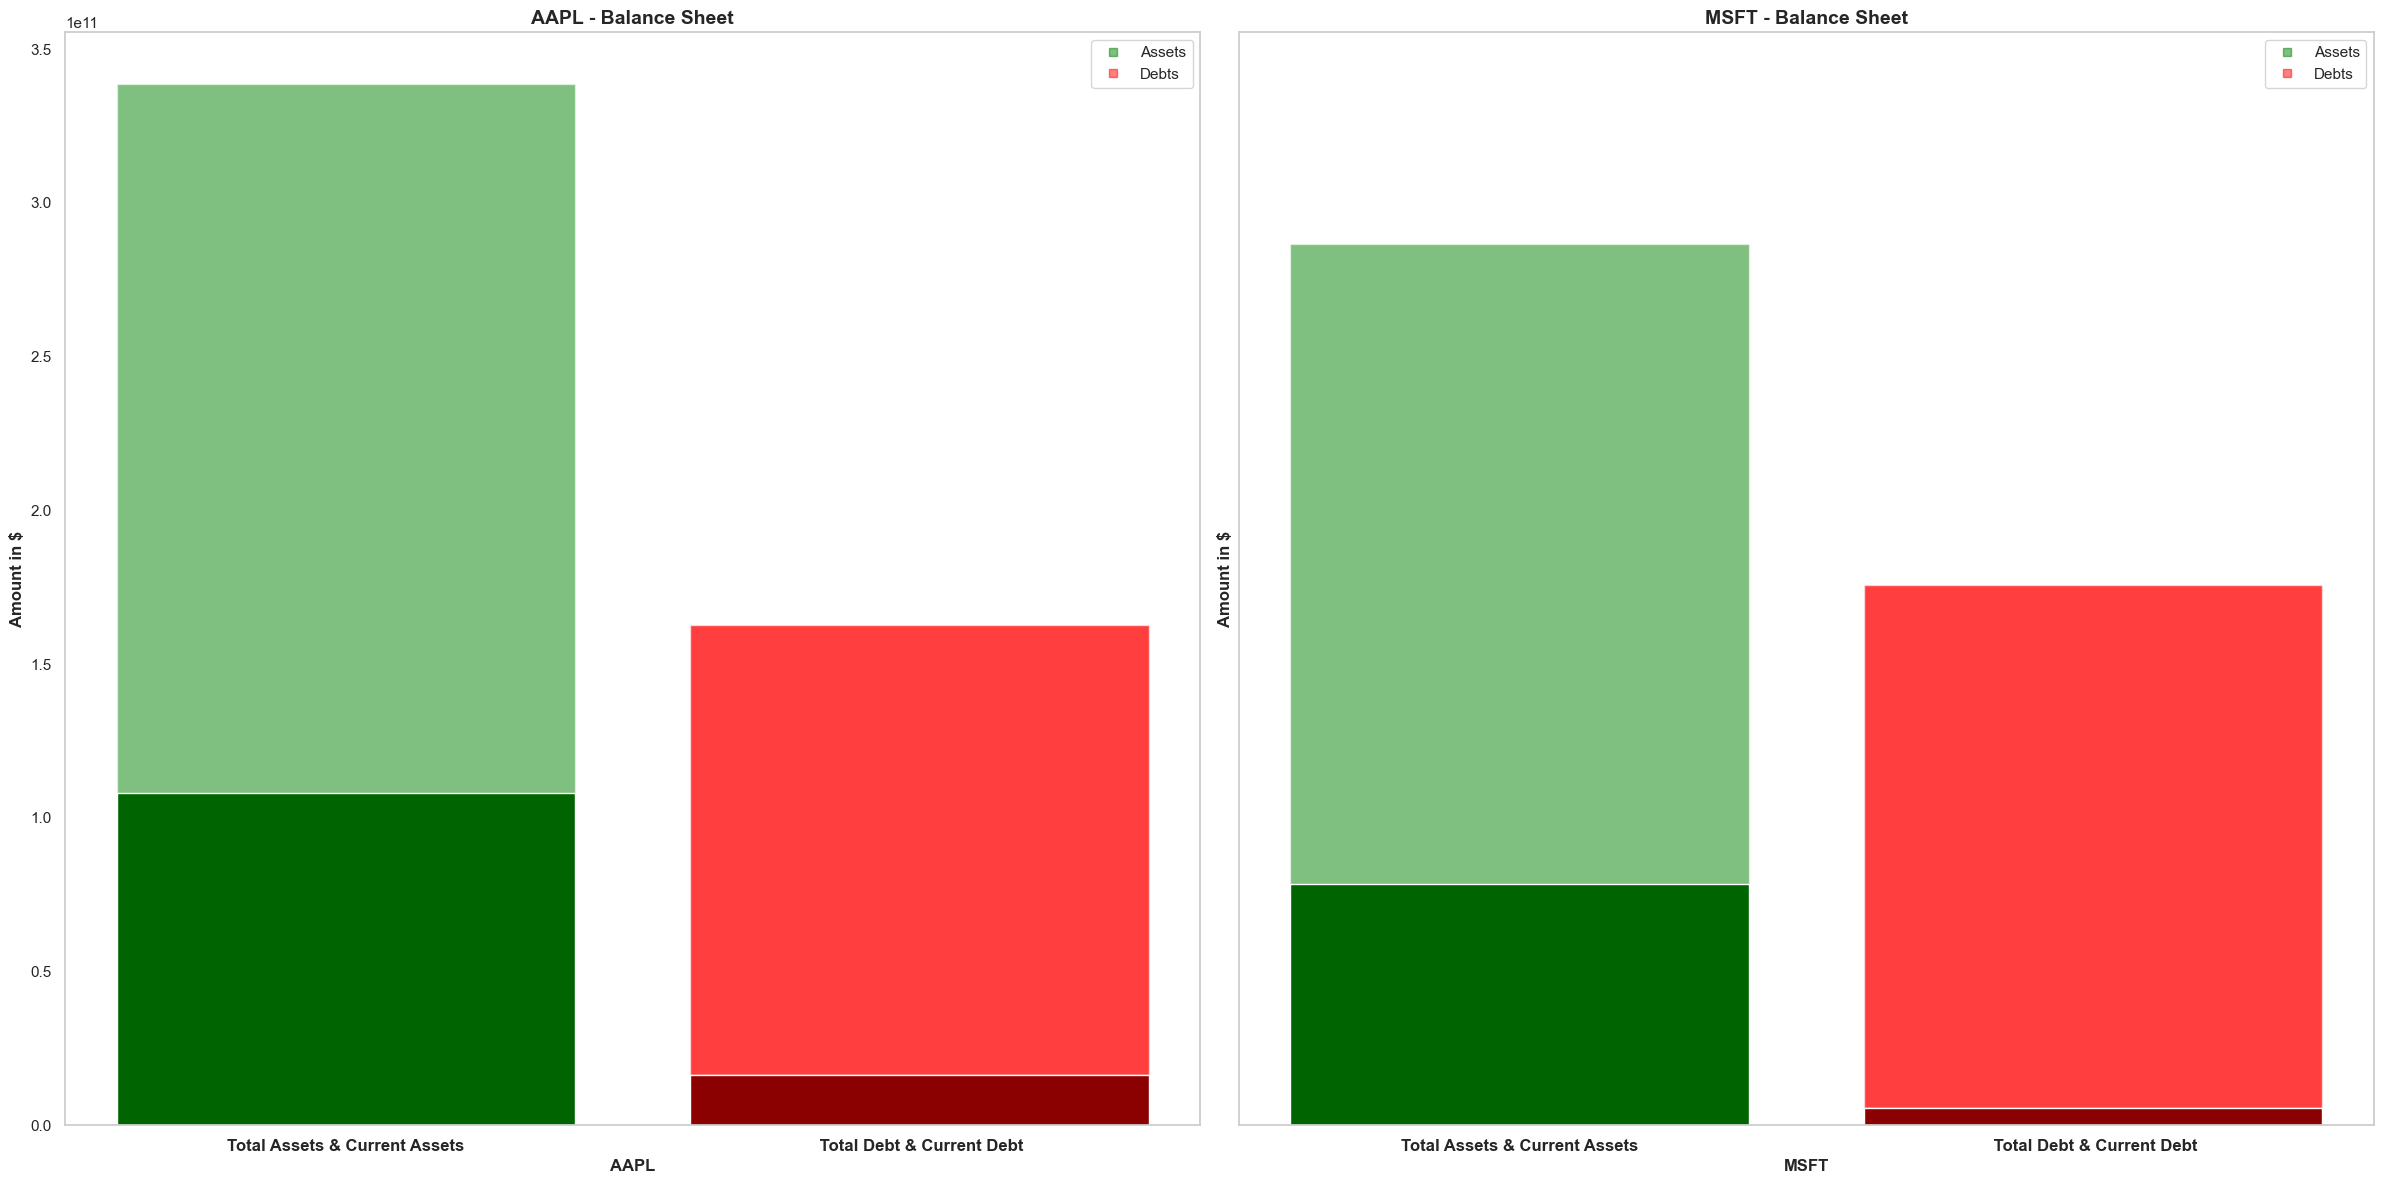

In [42]:
import sys
sys.path.append('../group-1')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as font_manager

def compare_balance_sheets(ticker_list: list):
    num_charts = len(ticker_list)

    fig, axes = plt.subplots(1, num_charts, figsize=(12*num_charts, 12), sharey=True)

 
    font = font_manager.FontProperties(weight='bold', size=12)

    for i, ticker in enumerate(ticker_list):
        assets_debt = pd.read_csv(r'../Companies_Data/'+ticker+'_Data/'+ticker+'_balance_sheet_4Y+4Q.csv')
        selected_data = assets_debt[['TotalAssets', 'TotalDebt', 'CurrentAssets', 'CurrentDebt']]

        sns.set(style="whitegrid")  

        ax = axes[i]
        asset_labels = ['Total Assets & Current Assets', ' Total Debt & Current Debt']
        asset_values = [selected_data.iloc[0]['TotalAssets'], selected_data.iloc[0]['CurrentAssets']]
        current_asset_values = [0, selected_data.iloc[0]['CurrentAssets']]
        ax.bar(range(len(asset_labels)), asset_values, color=['green', 'red'], label='Assets', alpha=0.5)
        ax.bar(range(len(asset_labels)), current_asset_values, color=['white', 'red'], alpha=0.5)

    
        debt_labels = ['Total Debt/ Current Debt', '']
        debt_values = [selected_data.iloc[0]['TotalDebt'], selected_data.iloc[0]['CurrentDebt']]
        current_debt_values = [0, selected_data.iloc[0]['CurrentDebt']]
        ax.bar(range(len(debt_labels)), debt_values, color=['darkgreen', 'darkred'], label='Debts')
        ax.bar(range(len(debt_labels)), current_debt_values, color=['white', 'darkred'])

        ax.set_title(f'{ticker} - Balance Sheet', fontproperties=font, fontsize=14, weight='bold')
        ax.set_xlabel(ticker, fontproperties=font)
        ax.set_ylabel('Amount in $', fontproperties=font)
        ax.set_xticks(range(len(asset_labels)))  
        ax.set_xticklabels(asset_labels, fontproperties=font)


        ax.xaxis.grid(False)
        ax.yaxis.grid(False)

     
        green_patch = plt.Line2D([0], [0], color='green', alpha=0.5, linewidth=0, marker='s')
        red_patch = plt.Line2D([0], [0], color='red', alpha=0.5, linewidth=0, marker='s')
        ax.legend([green_patch, red_patch], ['Assets', 'Debts'], loc='best')


    plt.tight_layout() 
    plt.show()

ticker_list = ['AAPL', 'MSFT']
compare_balance_sheets(ticker_list)


